In [4]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import duckdb

In [7]:
# Brands Table
brands = pd.read_csv(r"brands.csv")
brands.info()
brands.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand_id    9 non-null      int64 
 1   brand_name  9 non-null      object
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey


In [41]:
# Categories Table
categories = pd.read_csv(r"categories.csv")
categories.info()
categories.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    7 non-null      int64 
 1   category_name  7 non-null      object
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes


In [14]:
# Customer Table
Customers = pd.read_csv(r"customers.csv")
Customers.info()
Customers.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1445 non-null   int64 
 1   first_name   1445 non-null   object
 2   last_name    1445 non-null   object
 3   phone        178 non-null    object
 4   email        1445 non-null   object
 5   street       1445 non-null   object
 6   city         1445 non-null   object
 7   state        1445 non-null   object
 8   zip_code     1445 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 101.7+ KB


,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424
1444,1445,Ester,Acevedo,NaN,ester.acevedo@gmail.com,671 Miles Court,San Lorenzo,CA,94580


In [43]:
# Order_items Table
Order_items = pd.read_csv(r"order_items.csv")
Order_items.info()
Order_items.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     4722 non-null   int64  
 1   item_id      4722 non-null   int64  
 2   product_id   4722 non-null   int64  
 3   quantity     4722 non-null   int64  
 4   list_price   4722 non-null   float64
 5   discount     4722 non-null   float64
 6   total_value  4722 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 258.4 KB


,order_id,item_id,product_id,quantity,list_price,discount,total_value
0,1,1,20,1,599.99,0.20,479.99
1,1,2,8,2,1799.99,0.07,3347.98


In [28]:
# Order Table
orders = pd.read_csv(r"orders.csv")

orders["order_date"] = pd.to_datetime(orders["order_date"],dayfirst=True)
orders["required_date"] = pd.to_datetime(orders["required_date"],dayfirst=True)
orders["shipped_date"] = pd.to_datetime(orders["shipped_date"],dayfirst=True)

orders.info()
orders.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1615 non-null   int64         
 1   customer_id    1615 non-null   int64         
 2   order_status   1615 non-null   object        
 3   order_date     1615 non-null   datetime64[ns]
 4   required_date  1615 non-null   datetime64[ns]
 5   shipped_date   1445 non-null   datetime64[ns]
 6   store_id       1615 non-null   int64         
 7   staff_id       1615 non-null   int64         
dtypes: datetime64[ns](3), int64(4), object(1)
memory usage: 101.1+ KB


,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,Completed,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,Completed,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,Completed,2016-01-02,2016-01-05,2016-01-03,2,7


In [30]:
# Products Table
products = pd.read_csv(r"products.csv")
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    321 non-null    int64  
 1   product_name  321 non-null    object 
 2   brand_id      321 non-null    int64  
 3   category_id   321 non-null    int64  
 4   model_year    321 non-null    int64  
 5   list_price    321 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 15.2+ KB


In [ ]:
# Staffs Table 
staffs = pd.read_csv(r'staffs.csv')
staffs.info()
staffs.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   staff_id    10 non-null     int64  
 1   first_name  10 non-null     object 
 2   last_name   10 non-null     object 
 3   email       10 non-null     object 
 4   phone       10 non-null     object 
 5   active      10 non-null     int64  
 6   store_id    10 non-null     int64  
 7   manager_id  9 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 772.0+ bytes


,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [35]:
# Stocks Table
stocks = pd.read_csv(r'stocks.csv')
stocks.info()
stocks.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   store_id    939 non-null    int64
 1   product_id  939 non-null    int64
 2   quantity    939 non-null    int64
dtypes: int64(3)
memory usage: 22.1 KB


,store_id,product_id,quantity
936,3,311,23
937,3,312,18
938,3,313,0


In [38]:
# Stores Table
stores = pd.read_csv(r'stores.csv')
stores.info()
stores.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    3 non-null      int64 
 1   store_name  3 non-null      object
 2   phone       3 non-null      object
 3   email       3 non-null      object
 4   street      3 non-null      object
 5   city        3 non-null      object
 6   state       3 non-null      object
 7   zip_code    3 non-null      int64 
dtypes: int64(2), object(6)
memory usage: 324.0+ bytes


,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


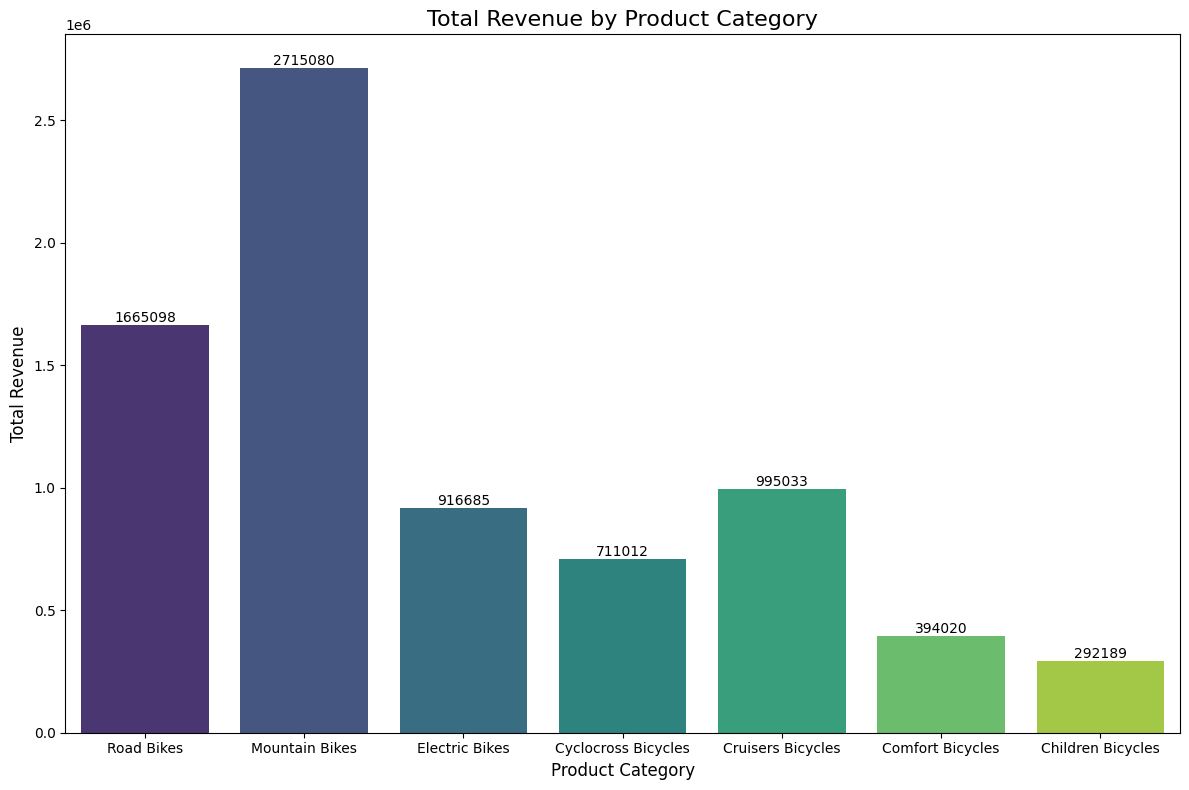

,category_name,total_revenue
0,Road Bikes,1665098.49
1,Mountain Bikes,2715079.53
2,Electric Bikes,916684.78
3,Cyclocross Bicycles,711011.84
4,Cruisers Bicycles,995032.62
5,Comfort Bicycles,394020.10
6,Children Bicycles,292189.20


In [50]:
# What is the total revenue generated by each product category?

query = """ 
    SELECT
        C.category_name,
        ROUND(SUM(OI.quantity * OI.list_price * (1 - OI.discount)),2) AS total_revenue
    FROM categories AS C
    INNER JOIN products AS P ON
    C.category_id = P.category_id
    INNER JOIN Order_items AS OI ON
    OI.product_id = P.product_id
    GROUP BY
        C.category_name
    ORDER BY
        C.category_name DESC
"""

cate_revenue = duckdb.query(query).df()
cate_revenue

# For barplot

plt.figure(figsize=(12,8))
sns.barplot(
    x='category_name',
    y='total_revenue',
    data=cate_revenue,
    palette='viridis'
)
for index, row in cate_revenue.iterrows():
    plt.text(
        index,
        row["total_revenue"],
        f'{row["total_revenue"]:.0f}',
        ha="center",
        va="bottom"
    )

plt.title("Total Revenue by Product Category", fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.tight_layout()
plt.show()

cate_revenue


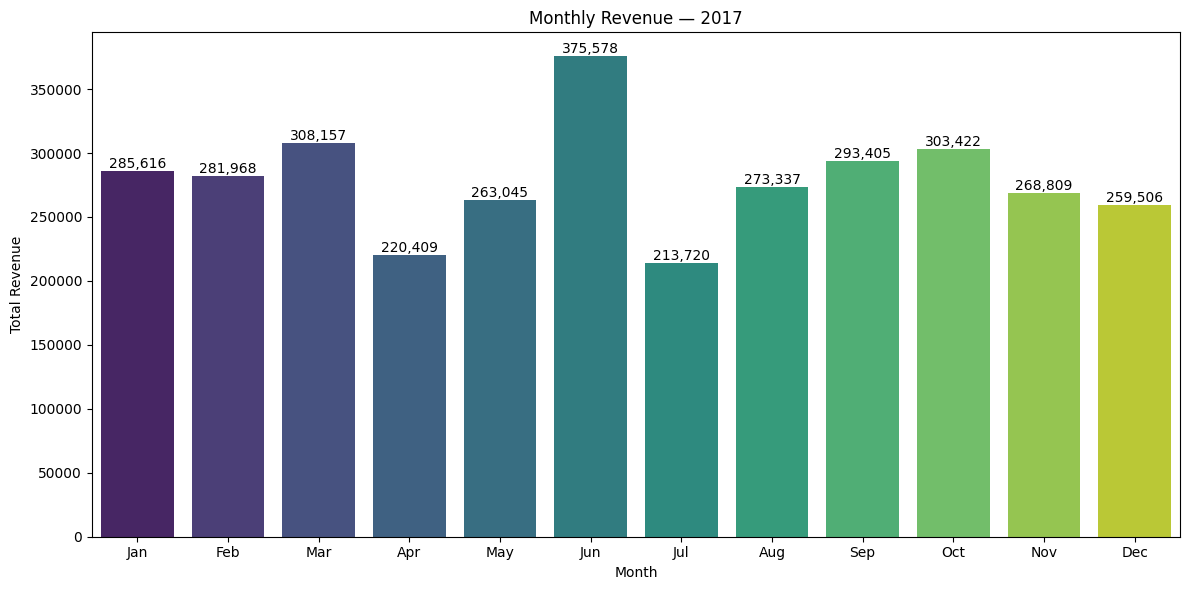

In [ ]:
# Revenue by Store

query = """
    SELECT
        EXTRACT(MONTH FROM O.order_date) AS month_num,
        strftime(O.order_date, '%b') AS sales_month,
        ROUND(SUM(OI.quantity * OI.list_price * (1 - OI.discount)),2) AS total_revenue
    FROM orders AS O
    INNER JOIN Order_items AS OI ON
    OI.order_id = O.order_id
    WHERE O.order_status = 'Completed'
    AND EXTRACT(YEAR FROM O.order_date) = 2017
    GROUP BY
        strftime(O.order_date, '%b'),
        EXTRACT(MONTH FROM O.order_date)
    ORDER BY
        EXTRACT(MONTH FROM O.order_date)
"""
monthly_revenue = duckdb.query(query).df()
monthly_revenue

plt.figure(figsize=(12, 6))

sns.barplot(
    x="sales_month",
    y="total_revenue",
    data=monthly_revenue,
    palette="viridis"
)

for i, v in enumerate(monthly_revenue["total_revenue"]):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.title("Monthly Revenue — 2017")
plt.xlabel("Month")
plt.ylabel("Total Revenue")

plt.tight_layout()
plt.show()


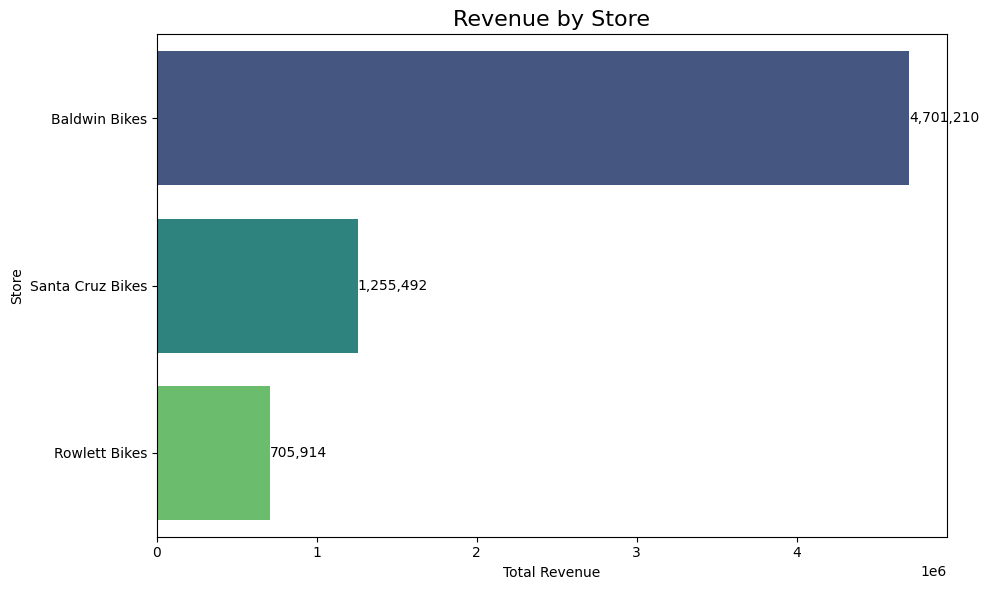

,store_name,total_revenue
0,Baldwin Bikes,4701209.57
1,Santa Cruz Bikes,1255491.65
2,Rowlett Bikes,705914.03


In [ ]:

query = """
    SELECT
        S.store_name,
        ROUND(SUM(OI.quantity * OI.list_price * (1 - OI.discount)), 2) AS total_revenue
    FROM stores S
    INNER JOIN orders O
    ON S.store_id = O.store_id
    INNER JOIN order_items OI
    ON O.order_id = OI.order_id
    WHERE O.order_status = 'Completed'
    GROUP BY 
        S.store_name
    ORDER BY 
        total_revenue DESC
"""

store_revenue = duckdb.query(query).df()


# For barplot

plt.figure(figsize=(10, 6))

sns.barplot(
    y="store_name",
    x="total_revenue",
    data=store_revenue,
    palette="viridis"
)

for i, v in enumerate(store_revenue["total_revenue"]):
    plt.text(v, i, f'{v:,.0f}', va='center')

plt.title("Revenue by Store", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("Store")

plt.tight_layout()
plt.show()

store_revenue


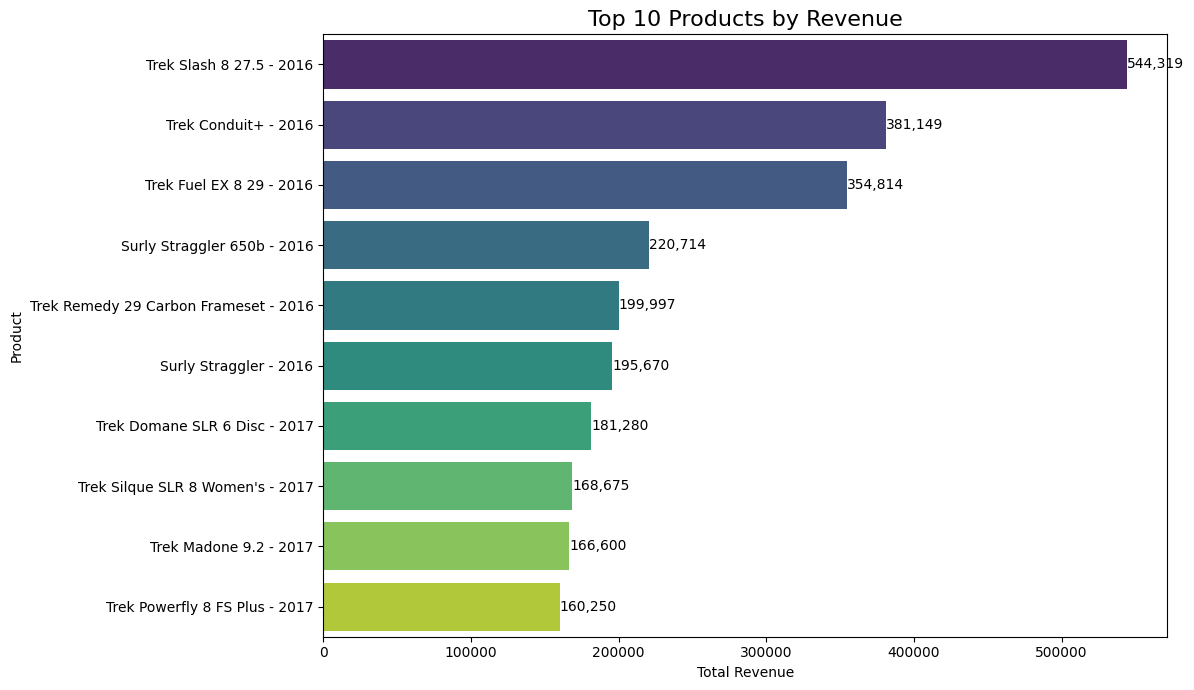

,product_name,total_revenue
0,Trek Slash 8 27.5 - 2016,544318.64
1,Trek Conduit+ - 2016,381148.73
2,Trek Fuel EX 8 29 - 2016,354813.78
3,Surly Straggler 650b - 2016,220713.99
4,Trek Remedy 29 Carbon Frameset - 2016,199996.89
5,Surly Straggler - 2016,195669.68
6,Trek Domane SLR 6 Disc - 2017,181279.67
7,Trek Silque SLR 8 Women's - 2017,168674.74
8,Trek Madone 9.2 - 2017,166599.67
9,Trek Powerfly 8 FS Plus - 2017,160249.68


In [ ]:
# Top 10 products

query = """
    SELECT
        P.product_name,
        ROUND(SUM(OI.quantity * OI.list_price * (1 - OI.discount)), 2) AS total_revenue
    FROM products P
    JOIN order_items OI
        ON P.product_id = OI.product_id
    JOIN orders O
        ON O.order_id = OI.order_id
    WHERE O.order_status = 'Completed'
    GROUP BY P.product_name
    ORDER BY total_revenue DESC
    LIMIT 10
"""

top_products = duckdb.query(query).df()

plt.figure(figsize=(12, 7))

sns.barplot(
    y="product_name",
    x="total_revenue",
    data=top_products,
    palette="viridis"
)

for i, v in enumerate(top_products["total_revenue"]):
    plt.text(v, i, f'{v:,.0f}', va='center')

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("Product")

plt.tight_layout()
plt.show()

top_products



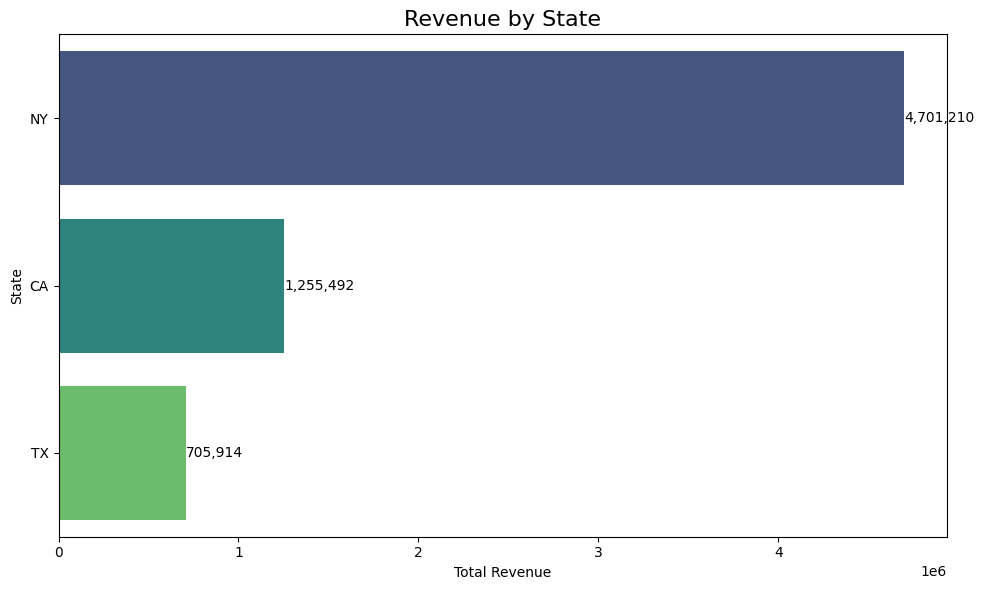

,state,total_revenue
0,NY,4701209.57
1,CA,1255491.65
2,TX,705914.03


In [ ]:
# Revenue by State

query = """
    SELECT
        C.state,
        ROUND(SUM(OI.quantity * OI.list_price * (1 - OI.discount)), 2) AS total_revenue
    FROM Customers C
    JOIN orders O
        ON C.customer_id = O.customer_id
    JOIN order_items OI
        ON O.order_id = OI.order_id
    WHERE O.order_status = 'Completed'
    GROUP BY C.state
    ORDER BY total_revenue DESC
"""

state_revenue = duckdb.query(query).df()

plt.figure(figsize=(10, 6))

sns.barplot(
    y="state",
    x="total_revenue",
    data=state_revenue,
    palette="viridis"
)

for i, v in enumerate(state_revenue["total_revenue"]):
    plt.text(v, i, f'{v:,.0f}', va='center')

plt.title("Revenue by State", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("State")

plt.tight_layout()
plt.show()

state_revenue




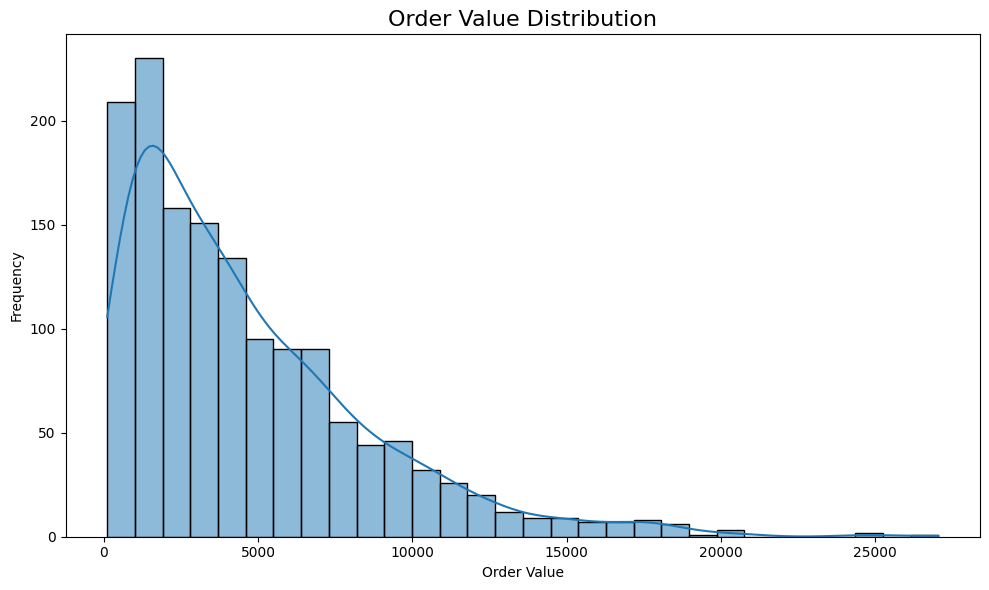

,order_id,order_value
0,42,426.5500
1,108,3155.0534
2,124,10866.9622
3,125,386.1000
4,128,8309.9320


In [ ]:
# Order Value Distribution

query = """
    SELECT
        O.order_id,
        SUM(OI.quantity * OI.list_price * (1 - OI.discount)) AS order_value
    FROM orders O
    JOIN order_items OI
        ON O.order_id = OI.order_id
    WHERE O.order_status = 'Completed'
    GROUP BY O.order_id
"""

order_values = duckdb.query(query).df()

order_values.head()



plt.figure(figsize=(10, 6))

sns.histplot(
    order_values["order_value"],
    bins=30,
    kde=True
)

plt.title("Order Value Distribution", fontsize=16)
plt.xlabel("Order Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

order_values.head()


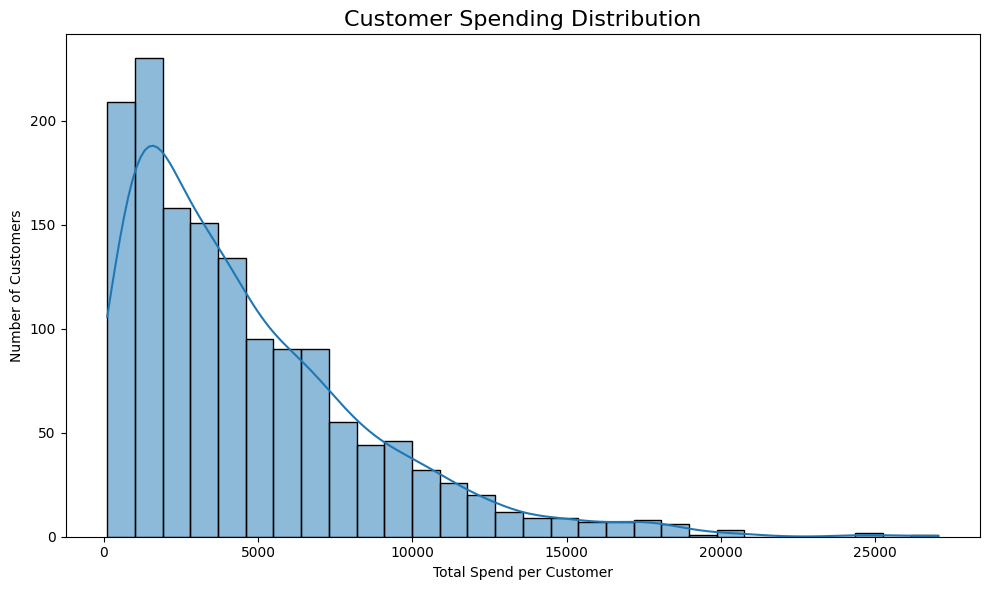

In [ ]:
query = """
    SELECT
        O.customer_id,
        SUM(OI.quantity * OI.list_price * (1 - OI.discount)) AS customer_spend
    FROM orders O
    JOIN order_items OI
        ON O.order_id = OI.order_id
    WHERE O.order_status = 'Completed'
    GROUP BY O.customer_id
"""

customer_spend = duckdb.query(query).df()

customer_spend.head()

plt.figure(figsize=(10, 6))

sns.histplot(
    customer_spend["customer_spend"],
    bins=30,
    kde=True
)

plt.title("Customer Spending Distribution", fontsize=16)
plt.xlabel("Total Spend per Customer")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()



In [77]:
query = """
    SELECT
        CASE
            WHEN COUNT(DISTINCT order_id) = 1
                THEN 'New Customer'
            ELSE 'Repeat Customer'
        END AS customer_type,
        COUNT(*) AS num_customers
    FROM orders
    WHERE order_status = 'Completed'
    GROUP BY customer_id
"""

cust_mix = duckdb.query(query).df()

cust_mix

plt.figure(figsize=(10, 6))

sns.barplot(
    x="customer_type",
    y="num_customers",
    data=cust_mix,
    palette="viridis"
)

# Labels
for i, v in enumerate(cust_mix["num_customers"]):
    plt.text(i, v, f'{v}', ha='center', va='bottom')

plt.title("New vs Repeat Customers", fontsize=16)
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


C:\Users\91852\AppData\Local\Temp\ipykernel_25760\3080612036.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
